# Step One: Factor Pretest

Different from the original Alphalens ducumentation, here I cast the Chinese A-stock data from RiceQuant into the preferable data structure that can be used in alphalens; and immediately do the following analysis (see rqdata_utils.py).

- Returns Analysis
- Information Coefficient Analysis
- Turnover Analysis

In [1]:
import alphalens as al
import numpy as np
import pandas as pd
import pytz
from rqdata_utils import *
%matplotlib inline

price_df,instrument_df,equity_df = get_price_instrument_equity("cn_stock_price_2012_2018.csv","cn_instrument_info_2012_2018.csv","cn_equity_daily_2012_2018.csv","sectorCode")

In [2]:
price_df.head()

,000001.XSHE,000002.XSHE,000004.XSHE,000005.XSHE,000006.XSHE,000007.XSHE,000008.XSHE,000009.XSHE,000010.XSHE,000011.XSHE,...,601933.XSHG,601939.XSHG,601958.XSHG,601988.XSHG,601989.XSHG,601991.XSHG,601992.XSHG,601996.XSHG,601998.XSHG,601999.XSHG
date,,,,,,,,,,,,,,,,,,,,,
2012-01-04,4.9886,5.6004,7.91,3.86,2.5072,4.6067,0.7503,4.4196,3.6575,5.3676,...,3.3540,2.9609,10.2997,1.9096,4.8559,4.3081,3.7102,1.9345,2.9971,7.1067
2012-01-05,5.0642,5.5393,7.33,3.86,2.4763,4.3733,0.7197,4.1745,3.6575,4.8362,...,3.3349,3.0136,9.9530,1.9424,4.6544,4.2589,3.5263,1.8143,3.0797,6.9465
2012-01-06,5.0511,5.4705,7.36,3.86,2.4701,4.2467,0.7242,4.4240,3.6575,4.9513,...,3.2991,3.0596,10.0655,1.9424,4.5680,4.3327,3.6551,1.8536,3.1173,7.0502
2012-01-09,5.1926,5.6615,7.70,3.86,2.5380,4.4133,0.7605,4.8659,3.6575,5.1727,...,3.3607,3.1188,10.6090,1.9555,4.7408,4.3655,3.8574,1.9484,3.1624,7.3518
2012-01-10,5.1926,5.7532,8.16,3.86,2.6307,4.5200,0.7990,5.0716,3.6575,5.4030,...,3.5477,3.1452,11.6681,1.9621,4.9903,4.3245,4.1056,2.1425,3.2074,7.6345


In [3]:
instrument_df.head()

,exchange,abbrevSymbol,shenwanIndustryCode,shenwanIndustryName,industryCode,industryName,sectorCode,sectorName
bookId,,,,,,,,
000001.XSHE,XSHE,PAYH,801780.INDX,银行,J66,货币金融服务,Financials,金融
000002.XSHE,XSHE,WKA,801180.INDX,房地产,K70,房地产业,RealEstate,房地产
000004.XSHE,XSHE,GNKJ,801150.INDX,医药生物,C27,医药制造业,HealthCare,医疗保健
000005.XSHE,XSHE,SJXY,801160.INDX,公用事业,N77,生态保护和环境治理业,Industrials,工业
000006.XSHE,XSHE,SZYA,801180.INDX,房地产,K70,房地产业,RealEstate,房地产


In [4]:
equity_df.head()

return   close  total_turnover      volume  \
date       order_book_id                                                 
2012-01-04 000001.XSHE   -0.027582  4.9886    2.275637e+08  40894428.0   
           000002.XSHE   -0.018742  5.6004    3.559891e+08  47432958.0   
           000004.XSHE   -0.022250  7.9100    3.763833e+06    465469.0   
           000005.XSHE    0.000000  3.8600    0.000000e+00         0.0   
           000006.XSHE   -0.009756  2.5072    7.619286e+06   2513811.0   

                            week   month report_quarter  pb_ratio  \
date       order_book_id                                            
2012-01-04 000001.XSHE    0.5242  0.4331            NaN       NaN   
           000002.XSHE    0.3887  0.4030         2011q3    1.5216   
           000004.XSHE    0.5797  0.7506         2011q3    8.8175   
           000005.XSHE       NaN     NaN         2011q3    5.3480   
           000006.XSHE    0.1601  0.1667         2011q3    1.4348   

                            net_profit  a_share_market_val_2  ps_ratio  \
date       order_book_id                                                 
2012-01-04 000001.XSHE             NaN                   NaN       NaN   
           000002.XSHE    4.106349e+09          7.082120e+10    1.1227   
           000004.XSHE    4.500363e+06          6.634549e+08    8.9157   
           000005.XSHE    1.365665e+07          3.527048e+09   55.5494   
           000006.XSHE    2.763917e+08          3.929464e+09    1.5507   

                          cash_received_from_sales_of_goods    market_cap  \
date       order_book_id                                                    
2012-01-04 000001.XSHE                                  NaN           NaN   
           000002.XSHE                         7.516785e+10  8.059489e+10   
           000004.XSHE                         5.949968e+07  6.642556e+08   
           000005.XSHE                         2.565851e+07  3.529328e+09   
           000006.XSHE                         2.531436e+09  4.015370e+09   

                           sectorCode  
date       order_book_id               
2012-01-04 000001.XSHE     Financials  
           000002.XSHE     RealEstate  
           000004.XSHE     HealthCare  
           000005.XSHE    Industrials  
           000006.XSHE     RealEstate

In [5]:
# sectorCodeSeries = instrument_df.sectorCode
# bookIdIdx = cn_df.index.get_level_values('order_book_id')
# bookIdArray = bookIdIdx.get_values()
# sectorInfo = sectorCodeSeries[bookIdArray[:]].values
# cn_df['sector'] = sectorInfo
# cn_df.head()
# sectorCodeFromBookId = lambda x: try(sectorCodeSeries[x]
# vSectorCodeFromBookId = np.vectorize(sectorCodeFromBookId)
# bookIdIdx = cn_df.index.get_level_values('order_book_id')
# bookIdArray = bookIdIdx.get_values()
# vSectorCodeFromBookId(bookIdArray)

In [6]:
# bookIdIdx = cn_df.index.get_level_values('order_book_id')
# for index,row in cn_df.iterrows():
#     print(instrument_df.loc[index,'sectorCode'])
#     break

In [7]:
# orderId = cn_df.index.get_level_values('order_book_id')
# sector = []
# total_dates = len(dates)
# for counter, date in enumerate(dates):
#     if(counter%100000==0):
#         print("date: {} | percentage: {}%".format(date,counter/total_dates*100))
#     sector.append(timezone.localize(date))
# aware
# cn_df.date = aware
# cn_df.set_index(['date','order_book_id'],drop=True,inplace=True)
# cn_df.drop(["Unnamed: 0"],axis=1,inplace=True)
# cn_df.head()

In [8]:
# cn_df.index.levels[1]

In [9]:
# cn_df = pd.read_csv("cn_equity_daily_2012_2018.csv")
# cn_df.date = pd.to_datetime(cn_df.date,format="%Y-%m-%d",errors='ignore')
# dates = cn_df.date
# aware = []
# total_dates = len(dates)
# for counter, date in enumerate(dates):
#     if(counter%100000==0):
#         print("date: {} | percentage: {}%".format(date,counter/total_dates*100))
#     aware.append(timezone.localize(date))
# aware
# cn_df.date = aware
# cn_df.set_index(['date','order_book_id'],drop=True,inplace=True)
# cn_df.drop(["Unnamed: 0"],axis=1,inplace=True)
# cn_df.head()

In [10]:
# map from order_book_id to sector


In [11]:
my_factor = equity_df['market_cap']
sectors = equity_df['sectorCode']
my_factor = my_factor.sort_index()
sectors = sectors.sort_index()
print(my_factor.head())
print(sectors.head())

date        order_book_id
2012-01-04  000001.XSHE               NaN
            000002.XSHE      8.059489e+10
            000004.XSHE      6.642556e+08
            000005.XSHE      3.529328e+09
            000006.XSHE      4.015370e+09
Name: market_cap, dtype: float64
date        order_book_id
2012-01-04  000001.XSHE       Financials
            000002.XSHE       RealEstate
            000004.XSHE       HealthCare
            000005.XSHE      Industrials
            000006.XSHE       RealEstate
Name: sectorCode, dtype: object


In [12]:
# Test
idx = pd.IndexSlice
price_df_test = price_df.iloc[:,1:1000]
universe_test = price_df_test.columns.values.tolist()
my_factor_test = my_factor.loc[idx[:,universe_test]]
sectors_test = sectors.loc[idx[:,universe_test]]

In [13]:
factor_data = al.utils.get_clean_factor_and_forward_returns(factor=my_factor_test,
                                                            prices=price_df_test,
                                                            groupby=sectors_test,
#                                                             groupby_labels=MORNINGSTAR_SECTOR_CODES,
                                                            periods=(1,5,10),
                                                            max_loss=1
                                                           )

Dropped 1.7% entries from factor data: 1.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!


In [14]:
factor_data.head()

1D        5D       10D        factor  \
date       asset                                                     
2012-01-04 000002.XSHE -0.010910  0.017731  0.024552  8.059489e+10   
           000004.XSHE -0.073325  0.021492  0.022756  6.642556e+08   
           000005.XSHE  0.000000  0.000000  0.000000  3.529328e+09   
           000006.XSHE -0.012325  0.046785  0.066489  4.015370e+09   
           000007.XSHE -0.050665 -0.027503  0.041961  1.595971e+09   

                              group  factor_quantile  
date       asset                                      
2012-01-04 000002.XSHE   RealEstate                5  
           000004.XSHE   HealthCare                1  
           000005.XSHE  Industrials                4  
           000006.XSHE   RealEstate                4  
           000007.XSHE   RealEstate                1

Returns Analysis


,1D,5D,10D
Ann. alpha,-0.068,-0.083,-0.083
beta,-0.108,-0.163,-0.180
Mean Period Wise Return Top Quantile (bps),-3.688,-4.966,-5.111
Mean Period Wise Return Bottom Quantile (bps),7.018,9.546,9.853
Mean Period Wise Spread (bps),-10.706,-14.527,-14.967


/home/peter/.conda/envs/finclab/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:837: PerformanceWarning: Non-vectorized DateOffset being applied to Series or DatetimeIndex
  PerformanceWarning,


<Figure size 432x288 with 0 Axes>

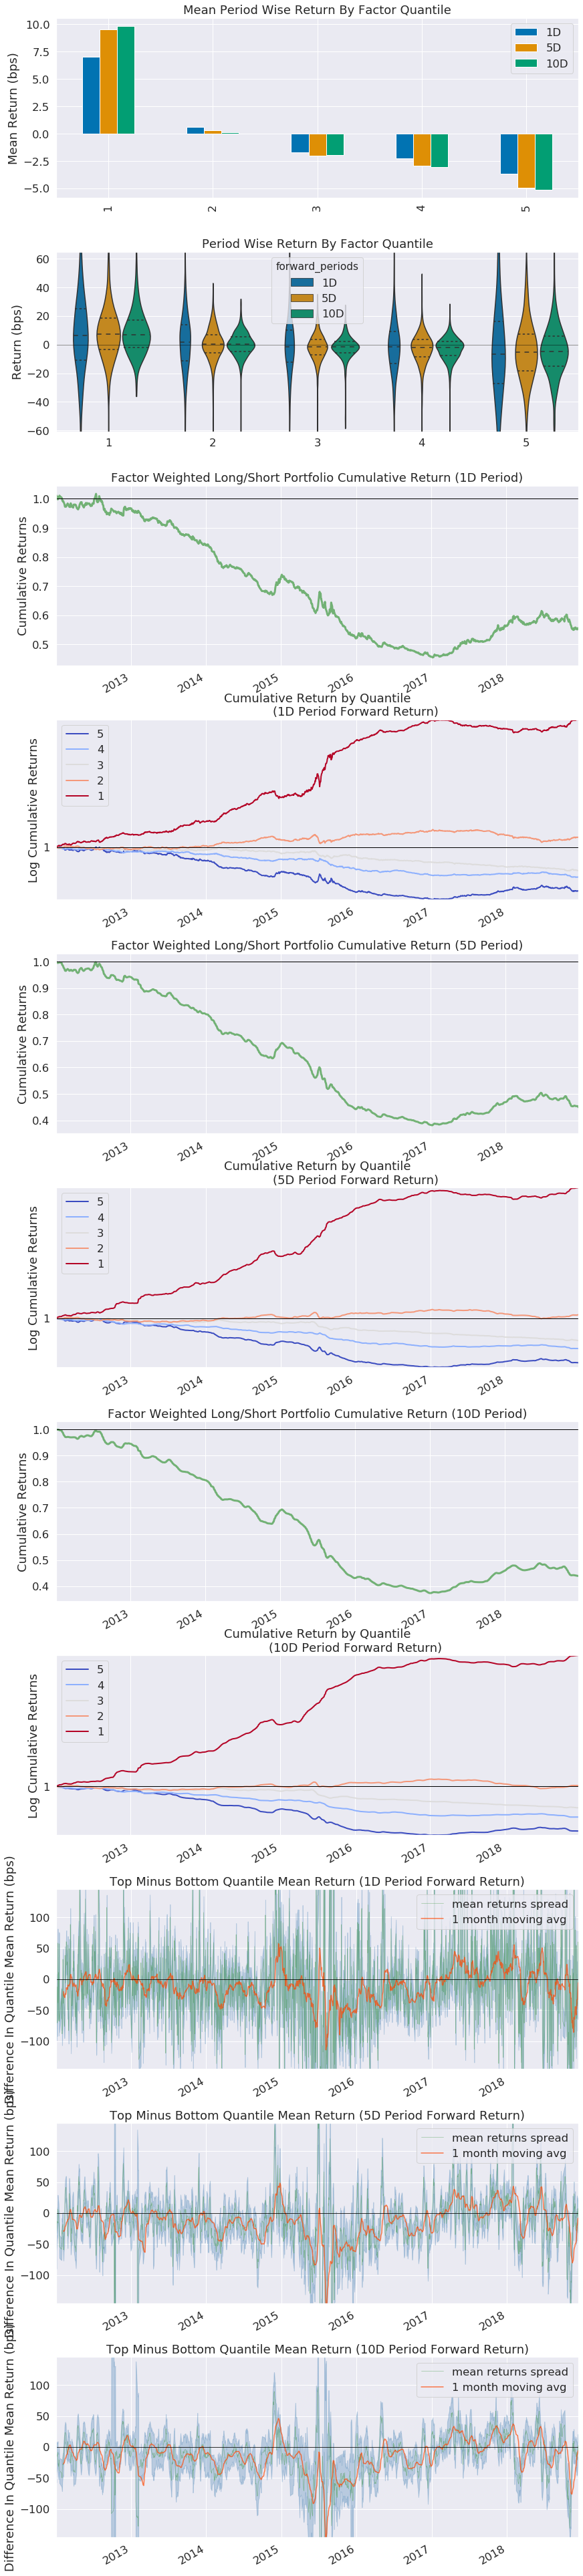

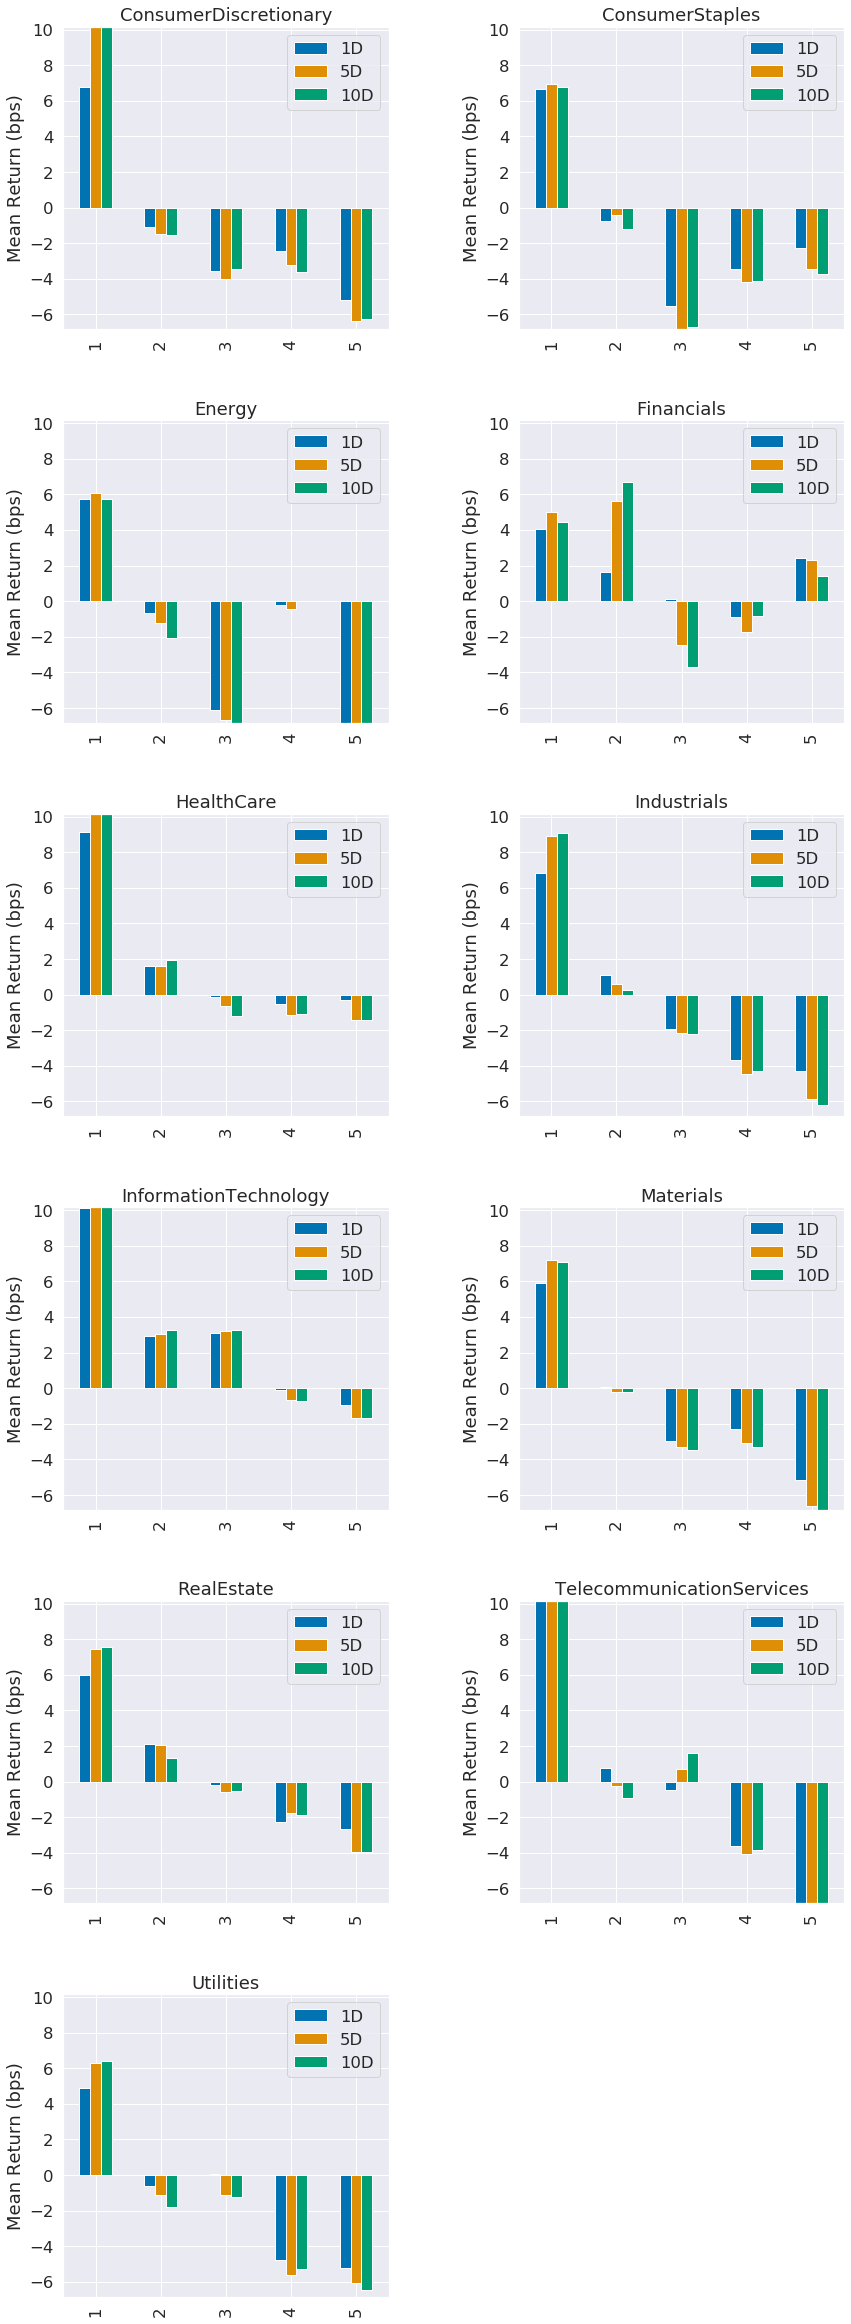

In [15]:
al.tears.create_returns_tear_sheet(factor_data,by_group=True)

Information Analysis


,1D,5D,10D
IC Mean,-0.020,-0.037,-0.050
IC Std.,0.107,0.132,0.145
Risk-Adjusted IC,-0.183,-0.282,-0.343
t-stat(IC),-7.532,-11.615,-14.098
p-value(IC),0.000,0.000,0.000
IC Skew,0.256,0.250,0.176
IC Kurtosis,0.688,0.011,-0.251


/home/peter/.conda/envs/finclab/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/peter/.conda/envs/finclab/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/peter/.conda/envs/finclab/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/peter/.conda/envs/finclab/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/peter/.conda/envs/finclab/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<Figure size 432x288 with 0 Axes>

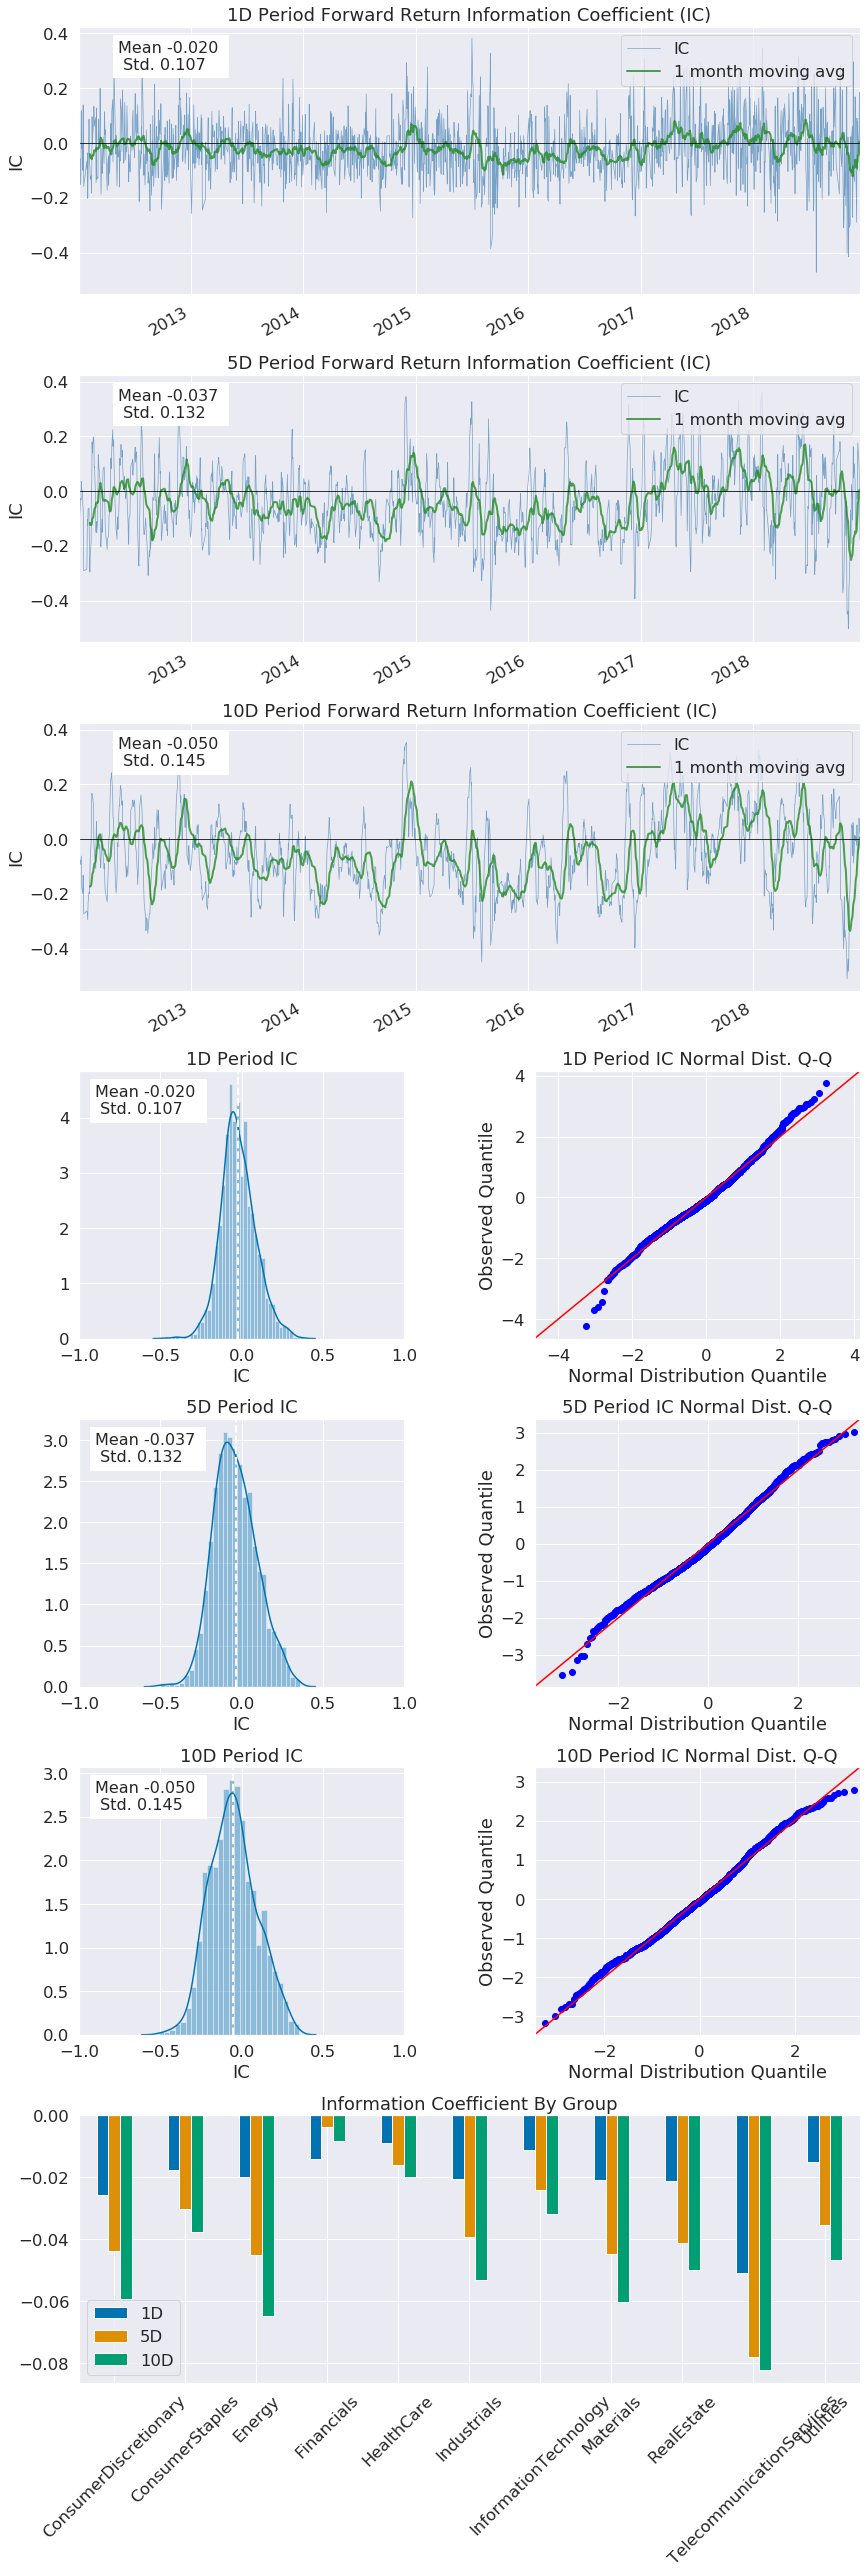

In [16]:
al.tears.create_information_tear_sheet(factor_data,by_group=True)

Turnover Analysis


,10D,1D,5D
Quantile 1 Mean Turnover,0.068,0.021,0.048
Quantile 2 Mean Turnover,0.139,0.043,0.099
Quantile 3 Mean Turnover,0.132,0.041,0.094
Quantile 4 Mean Turnover,0.101,0.031,0.071
Quantile 5 Mean Turnover,0.041,0.012,0.029


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.999,0.996,0.992


<Figure size 432x288 with 0 Axes>

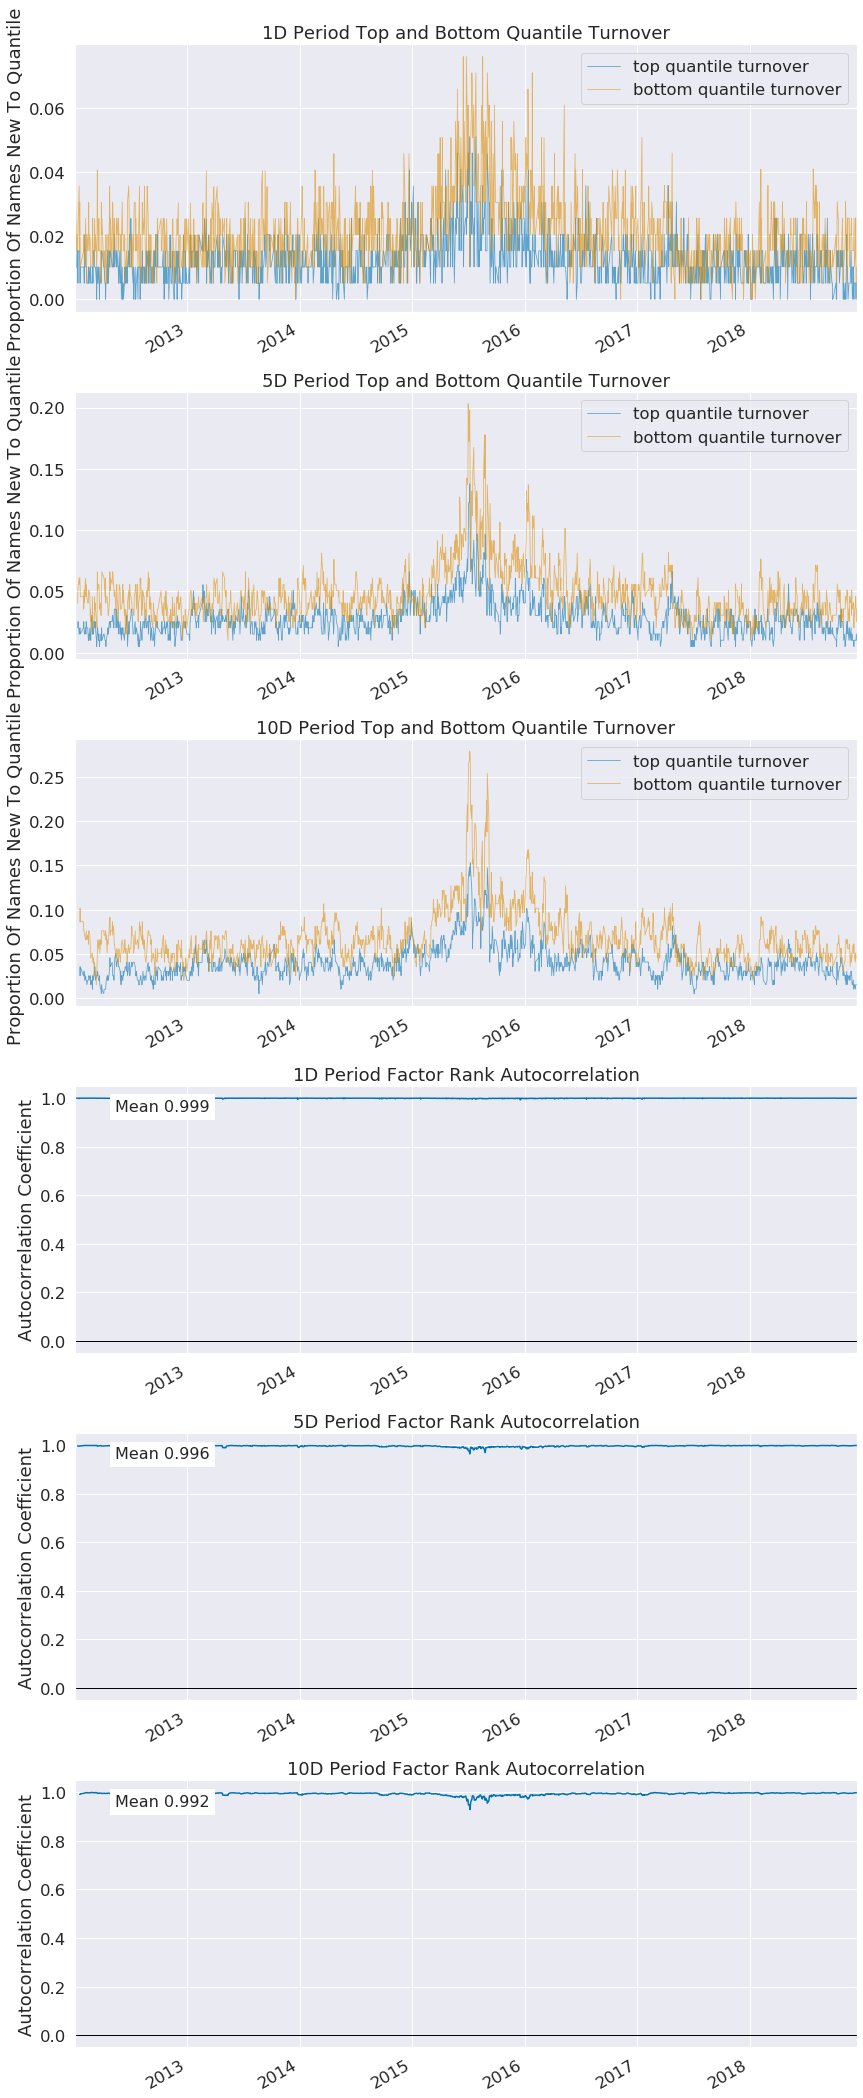

In [17]:
al.tears.create_turnover_tear_sheet(factor_data)